In [7]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [8]:
house_price=load_boston()

In [10]:
df=pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE']=house_price.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
#standardize and trine/test split
house_price.data=preprocessing.scale(house_price.data)
house_price.data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [20]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(house_price.data,house_price.target,test_size=0.3,random_state=10)

In [21]:
X_traine.shape

(354, 13)

In [22]:
X_test.shape

(152, 13)

In [23]:
Y_traine.shape

(354,)

In [24]:
Y_test.shape

(152,)

In [27]:
ols_reg=LinearRegression()
ols_reg.fit(X_traine,Y_traine)
ols_predic=ols_reg.predict(X_test)
pd.DataFrame({'variable':house_price.feature_names,'estimate':ols_reg.coef_})

,variable,estimate
0,CRIM,-1.321404
1,ZN,1.514832
2,INDUS,-0.166266
3,CHAS,0.411579
4,NOX,-1.771168
5,RM,2.352821
6,AGE,0.318499
7,DIS,-3.256645
8,RAD,2.632576
9,TAX,-2.059466


In [28]:
#Ridge Regression
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
#initialize
ridge_reg=Ridge(alpha=0)
ridge_reg.fit(X_traine,Y_traine)
ridge_df=pd.DataFrame({'variable':house_price.feature_names,'estimate':ridge_reg.coef_})
ridge_df

,variable,estimate
0,CRIM,-1.321404
1,ZN,1.514832
2,INDUS,-0.166266
3,CHAS,0.411579
4,NOX,-1.771168
5,RM,2.352821
6,AGE,0.318499
7,DIS,-3.256645
8,RAD,2.632576
9,TAX,-2.059466


In [36]:
ridge_traine_pred=[]
ridge_test_pred=[]
alphas=np.arange(0,100,1)

for alpha in alphas:
    ridge_reg=Ridge(alpha=alpha)
    ridge_reg.fit(X_traine,Y_traine)
    var_name='estimation'+str(alpha)
    ridge_df[var_name]=ridge_reg.coef_
    
    #prediction
    ridge_traine_pred.append(ridge_reg.predict(X_traine))
    ridge_test_pred.append(ridge_reg.predict(X_test))
ridge_df=ridge_df.set_index('variable').T.rename_axis('estimation')
ridge_df

variable,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
estimation,,,,,,,,,,,,,
estimate,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
estimation0,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
estimation1,-1.305844,1.491704,-0.186300,0.416554,-1.734866,2.368304,0.305241,-3.213459,2.540705,-1.976631,-1.746362,1.179751,-3.867286
estimation2,-1.291053,1.469716,-0.204508,0.421192,-1.700188,2.382762,0.292616,-3.171513,2.455276,-1.900395,-1.737941,1.178322,-3.847925
estimation3,-1.276962,1.448771,-0.221104,0.425531,-1.667018,2.396278,0.280573,-3.130750,2.375608,-1.830033,-1.729900,1.176856,-3.828944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
estimation95,-0.808201,0.818395,-0.477197,0.519218,-0.673511,2.476215,-0.099529,-1.467445,0.537842,-0.579640,-1.411582,0.988395,-2.822976
estimation96,-0.805993,0.816034,-0.477674,0.519265,-0.670208,2.473534,-0.101127,-1.458896,0.532002,-0.577655,-1.409499,0.986455,-2.816081
estimation97,-0.803807,0.813705,-0.478145,0.519303,-0.666960,2.470838,-0.102707,-1.450436,0.526241,-0.575716,-1.407426,0.984523,-2.809234


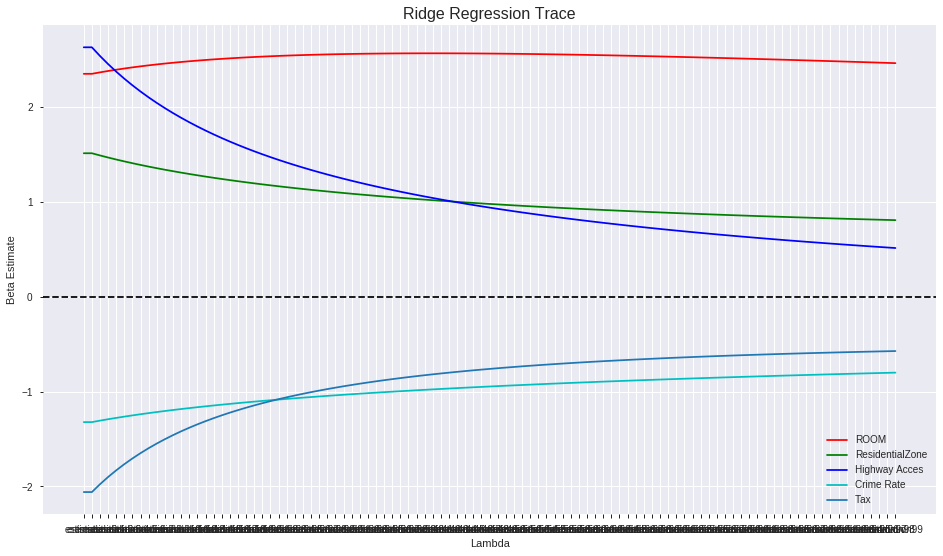

In [39]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(ridge_df.RM,'r',ridge_df.ZN,'g',ridge_df.RAD,'b',ridge_df.CRIM,'c',ridge_df.TAX)
ax.axhline(y=0,color='black',linestyle='--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Ridge Regression Trace',fontsize=16)
ax.legend(labels=['ROOM','ResidentialZone','Highway Acces','Crime Rate','Tax'])
ax.grid(True)

In [40]:
from sklearn.model_selection import learning_curve

In [41]:
Train_size,Trin_score,validation_score=learning_curve(ridge_reg,X_traine,Y_traine,cv=20)

In [42]:
Train_size

array([ 33, 109, 184, 260, 336])

In [43]:
Trin_score

array([[0.37194286, 0.70379004, 0.42503908, 0.42503908, 0.42503908,
        0.42503908, 0.42503908, 0.42503908, 0.42503908, 0.42503908,
        0.42503908, 0.42503908, 0.42503908, 0.42503908, 0.42503908,
        0.42503908, 0.42503908, 0.42503908, 0.42503908, 0.42503908],
       [0.64664183, 0.74159401, 0.66486649, 0.65752105, 0.6666408 ,
        0.68291257, 0.60384938, 0.61971833, 0.61971833, 0.61971833,
        0.61971833, 0.61971833, 0.61971833, 0.61971833, 0.61971833,
        0.61971833, 0.61971833, 0.61971833, 0.61971833, 0.61971833],
       [0.71256547, 0.77164986, 0.72149997, 0.71604742, 0.72082215,
        0.72951733, 0.69672238, 0.73226637, 0.72562663, 0.72711098,
        0.71039482, 0.70841938, 0.70841938, 0.70841938, 0.70841938,
        0.70841938, 0.70841938, 0.70841938, 0.70841938, 0.70841938],
       [0.72698103, 0.76982585, 0.73307629, 0.72942378, 0.73479242,
        0.7395708 , 0.7165877 , 0.74133521, 0.73844015, 0.73821412,
        0.72505363, 0.73419677, 0.74344253, 0

In [44]:
validation_score

array([[0.34748891, 0.1495825 , 0.38261266, 0.41363959, 0.26895467,
        0.48165979, 0.48847325, 0.53233882, 0.31000143, 0.37509895,
        0.34701887, 0.44013649, 0.31049393, 0.470103  , 0.2625181 ,
        0.51869503, 0.35718999, 0.21227806, 0.11728112, 0.23809844],
       [0.76620423, 0.2304411 , 0.76963832, 0.73504138, 0.56321158,
        0.44570869, 0.75736897, 0.60988727, 0.58311019, 0.66774306,
        0.63855321, 0.5414824 , 0.51146977, 0.68444117, 0.63920521,
        0.74037581, 0.64662862, 0.18309419, 0.25666701, 0.45612825],
       [0.87583541, 0.2060075 , 0.81233001, 0.82446061, 0.66749413,
        0.51212536, 0.83697864, 0.61125096, 0.64283497, 0.71430365,
        0.73780878, 0.68330395, 0.58464732, 0.75943754, 0.69894491,
        0.81538871, 0.71474118, 0.14721457, 0.29184855, 0.54738561],
       [0.89281959, 0.23107383, 0.8267726 , 0.84301016, 0.67994691,
        0.50416021, 0.85094421, 0.62360595, 0.66942945, 0.71814497,
        0.77531225, 0.71950455, 0.60955927, 0

In [46]:
mean_train_score=-Trin_score.mean(axis=1)
mean_validation_score=-validation_score.mean(axis=1)

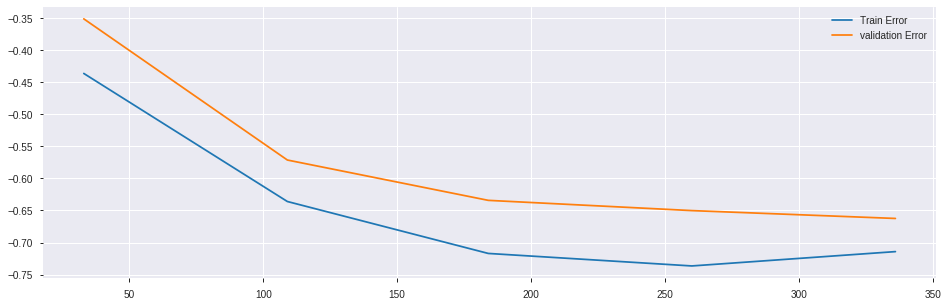

In [47]:
plt.figure(figsize=(16,5))
plt.plot(Train_size,mean_train_score,label='Train Error')
plt.plot(Train_size,mean_validation_score,label='validation Error')
plt.legend()